# **PREDICTING DIAMETER OF ASTEROIDS USING PRINCIPLES OF MACHINE LEARNING**


We have used NASA’s Jet Propulsion Laboratory’s Small Object Database to compare three different
regression models using an adjusted R2 score method, absolute mean square error and root mean squared error to
find the most accurate method to determine the diameter of a small object and asteroids using physical parameters,
orbital elements and discovery circumstances. We check the correlation matrix of all the attributes of the dataset to
select the correct attributes for modeling. We have used an adjusted R2 score over the naïve R2 score for this
particular database as it has a lot of attributes. After comparing, we observe Random forest model gives the best
accuracy


In [ ]:
#importing the necessary libraries
import pandas as pd
from google.colab import drive
import numpy as np
import statsmodels.api as sm
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
drive.mount("/content/gdrive")
data=pd.read_csv("/content/gdrive/My Drive/Asteroid_Updated.csv")

Mounted at /content/gdrive


In [ ]:
data["diameter"]=data["diameter"].astype(float)  #setting the datatype for values
df1=data[data['diameter'].notnull()]  #Taking only those entries where the diameter has been specified
df1.columns #looking at the data

Index(['name', 'a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc',
       'condition_code', 'n_obs_used', 'H', 'moid', 'class', 'n', 'per', 'ma',
       'albedo', 'diameter'],
      dtype='object')

In [ ]:
df1

,name,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,moid,class,n,per,ma,albedo,diameter
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0,1002,3.34,1.59478,MBA,0.213885,1683.145708,77.372096,0.0900,939.400
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0,8490,4.13,1.23324,MBA,0.213503,1686.155999,59.699133,0.1010,545.000
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0,7104,5.33,1.03454,MBA,0.226019,1592.787285,34.925016,0.2140,246.596
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0,9325,3.20,1.13948,MBA,0.271609,1325.432765,95.861936,0.4228,525.400
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,0,2916,6.85,1.09589,MBA,0.238632,1508.600458,282.366289,0.2740,106.699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797860,NaN,3.171225,0.159119,27.098625,309.036573,19.746812,2.666623,3.675826,5.647402,2373.0,1,50,16.20,1.66301,MBA,0.174527,2062.713583,164.999439,0.0210,3.793
798077,NaN,2.548410,0.076071,11.593237,246.298656,170.090810,2.354549,2.742270,4.068291,3297.0,2,33,17.30,1.36733,MBA,0.242270,1485.943371,145.319581,0.0610,2.696
798189,NaN,3.146246,0.220559,17.966646,137.981403,180.898832,2.452313,3.840180,5.580811,2839.0,1,47,16.80,1.43837,MBA,0.176610,2038.391053,174.609920,NaN,2.917
799752,NaN,3.051336,0.287449,14.456779,343.917822,342.614839,2.174231,3.928440,5.330196,2208.0,2,27,17.20,1.16684,MBA,0.184914,1946.853973,175.708508,0.0720,3.271


In [ ]:
dropcol=["name","condition_code","class","n_obs_used","data_arc"] #Removing unnecesarry datapoints    
df1=df1.drop(columns=dropcol)
df1["H"]=df1["H"].fillna(df1["H"].median()) #replacing with median
df1["albedo"]=df1["albedo"].fillna(df1["albedo"].median())  #replacing blank entries with the median
df1.shape #looking at the size and shape of our data  

(137636, 15)

In [ ]:
df1.isnull().values.any() #Final check for absence of NaN values

False

# **Analysing the data**

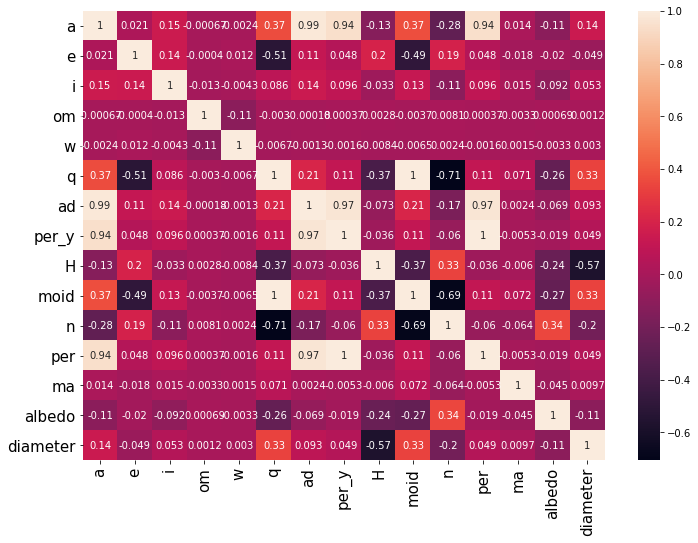

In [ ]:
corrmat=df1.corr()
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
plt.tick_params(labelsize=15)
sn.heatmap(corrmat,annot=True)
plt.show()

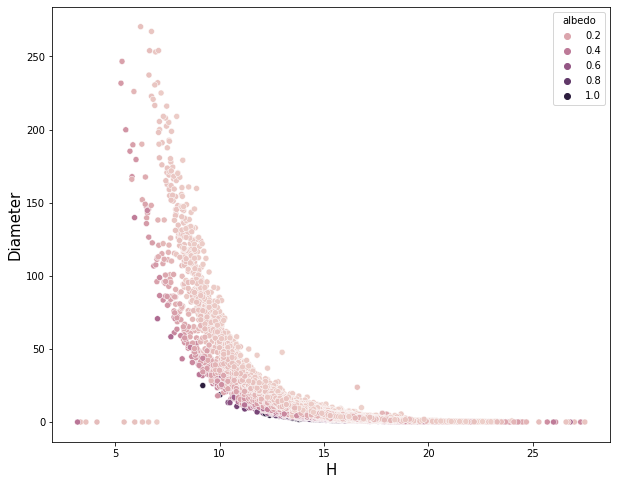

In [ ]:
fig = plt.gcf()
fig.set_size_inches(10,8)
k=data["diameter"].astype(float)<300
b=sn.scatterplot(x=(data["H"].astype(float)),y=k*data["diameter"].astype(float),hue=data["albedo"])

b.set_xlabel("H",fontsize=15)
b.set_ylabel("Diameter",fontsize=15)
b.tick_params(labelsize=10)
b

# Training the data on various models

In [ ]:
X = df1.iloc[:,0:15].to_numpy().astype(float) #Setting independent variables
Y = df1["diameter"].to_numpy().astype(float)  #Setting the dependent variable

1. Random forest regressor

In [ ]:
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
xx=[]
for dep in range(3,12):
  X = df1.iloc[:,0:15].to_numpy().astype(float)
  Y = df1["diameter"].to_numpy().astype(float)
  regr = RandomForestRegressor(max_depth=dep, random_state=0)
  regr.fit(X[:100000], Y[:100000])
  k=regr.predict(X[100000:])
  print(r2_score(k,Y[100000:]))
  xx.append(r2_score(k,Y[100000:]))


0.4784632593247423
0.89558519717541
0.9743259956093332
0.9924015688996077
0.9969933138848633
0.9993783458952125
0.9998559510542451
0.999949751527401
0.9999760911038881


Adjusted R2 score:

In [ ]:
def radj(R):
  r=1-((1-R)*(pow(137636,(1/3))-1))/(pow(137636,1/3)-15-1)
  return r

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(k,Y[100000:]))
print('Mean Squared Error:', metrics.mean_squared_error(k,Y[100000:]))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(k,Y[100000:])))
print('Adjusted R2 Score: ', radj(r2_score(k,Y[100000:])))

Mean Absolute Error: 0.001390464951200759
Mean Squared Error: 0.0001051196155279215
Root Mean Squared Error: 0.010252785744758422
Adjusted R2 Score:  0.9999660259002987


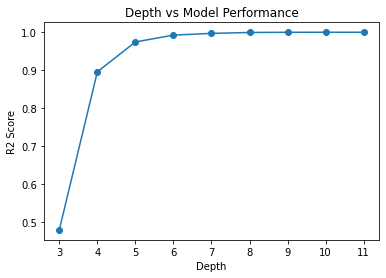

In [ ]:
plt.xlabel("Depth")
plt.ylabel("R2 Score")
plt.title("Depth vs Model Performance")
plt.plot(range(3,12),xx,"o",ls="-")

**Multi Layer Perceptron or Neural Network**

In [ ]:
import keras
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam

Adam(learning_rate=0.01)
opt = keras.optimizers.SGD(learning_rate=0.01,momentum=1)
X = df1.iloc[:,0:15].to_numpy().astype(float)
Y = df1["diameter"].to_numpy().astype(float)
model = Sequential()
model.add(Dense(64,activation='relu',input_dim=X.shape[1]))
model.add(Dense(128,activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error',optimizer='Adam')

model.fit(X,Y,epochs=150,batch_size=256,verbose=False)



In [ ]:

k = model.predict(X[100000:])
print('Mean Absolute Error:', metrics.mean_absolute_error(k,Y[100000:]))
print('Mean Squared Error:', metrics.mean_squared_error(k,Y[100000:]))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(k,Y[100000:])))
print('Adjusted R2 Score: ', radj(r2_score(k,Y[100000:])))

      

Mean Absolute Error: 0.4365309925609984
Mean Squared Error: 0.7275420099803898
Root Mean Squared Error: 0.8529607317927301


0.81463201380261

In [ ]:
import xgboost as xgb 
xgReg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree =0.4, 
                         learning_rate = 0.05 ,
              max_depth = 3, n_estimators = 1000,gamma=0.1,scale_pos_weight = 1,min_child_weight = 1 )

### Training
xgReg.fitX[:100000], Y[:100000])

### Predicting
Y_pred_xgb = xgReg.predict(Y[100000:])